## Pecan Street Model
This code is a work in progress to make a general ML model using the Pecan Street Data. Currently, the data used was meauresed at a 15 minute interval. Using data from a smaller period such as 1 minute could improve results. Also, more preproccesing and better archetecture of the model.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/15minute_data_austin.csv')

This specifies the different appliance categories

In [ ]:
appliance_categories = {
    'air1': 'HVAC',
    'air2': 'HVAC',
    'air3': 'HVAC',
    'airwindowunit1': 'HVAC',
    'aquarium1': 'Other',
    'bathroom1': 'Other',
    'bathroom2': 'Other',
    'bedroom1': 'Other',
    'bedroom2': 'Other',
    'bedroom3': 'Other',
    'bedroom4': 'Other',
    'bedroom5': 'Other',
    'battery1': 'Other',
    'car1': 'Other',
    'car2': 'Other',
    'circpump1': 'Other',
    'clotheswasher1': 'Laundry',
    'clotheswasher_dryg1': 'Laundry',
    'diningroom1': 'Other',
    'diningroom2': 'Other',
    'dishwasher1': 'Kitchen',
    'disposal1': 'Kitchen',
    'drye1': 'Laundry',
    'dryg1': 'Laundry',
    'freezer1': 'Kitchen',
    'furnace1': 'HVAC',
    'furnace2': 'HVAC',
    'garage1': 'Other',
    'garage2': 'Other',
    'grid': 'Other',
    'heater1': 'HVAC',
    'heater2': 'HVAC',
    'heater3': 'HVAC',
    'housefan1': 'HVAC',
    'icemaker1': 'Kitchen',
    'jacuzzi1': 'Other',
    'kitchen1': 'Kitchen',
    'kitchen2': 'Kitchen',
    'kitchenapp1': 'Kitchen',
    'kitchenapp2': 'Kitchen',
    'lights_plugs1': 'Lights/Plugs',
    'lights_plugs2': 'Lights/Plugs',
    'lights_plugs3': 'Lights/Plugs',
    'lights_plugs4': 'Lights/Plugs',
    'lights_plugs5': 'Lights/Plugs',
    'lights_plugs6': 'Lights/Plugs',
    'livingroom1': 'Other',
    'livingroom2': 'Other',
    'microwave1': 'Kitchen',
    'office1': 'Other',
    'outsidelights_plugs1': 'Lights/Plugs',
    'outsidelights_plugs2': 'Lights/Plugs',
    'oven1': 'Kitchen',
    'oven2': 'Kitchen',
    'pool1': 'Pool',
    'pool2': 'Pool',
    'poollight1': 'Pool',
    'poolpump1': 'Pool',
    'pump1': 'Other',
    'range1': 'Kitchen',
    'refrigerator1': 'Kitchen',
    'refrigerator2': 'Kitchen',
    'security1': 'Other',
    'sewerpump1': 'Other',
    'shed1': 'Other',
    'solar': 'Solar',
    'solar2': 'Solar',
    'sprinkler1': 'Other',
    'sumppump1': 'Other',
    'utilityroom1': 'Other',
    'venthood1': 'Kitchen',
    'waterheater1': 'Water Heater',
    'waterheater2': 'Water Heater',
    'wellpump1': 'Other',
    'winecooler1': 'Kitchen',
    'leg1v': 'Other',
    'leg2v': 'Other',
}

This creates a new dataframe where all the appliances are consolidated into the categories above

In [ ]:
categorized_df = df
# Create new columns for each category
categories = list(set(appliance_categories.values()))
for category in categories:
    categorized_df[category] = 0

# Sum the power consumption for each category
for category, appliances in categorized_df.groupby(appliance_categories, axis=1):
    categorized_df[category] = appliances.sum(axis=1, skipna=True)

# Drop the individual appliance columns
categorized_df = categorized_df.drop(columns=list(appliance_categories.keys()))


In [ ]:
categorized_df = categorized_df.drop(columns='Solar')

NameError: name 'categorized_df' is not defined

In [ ]:
categorized_df = categorized_df.rename(columns={'local_15min': 'Timestamp'})


In [ ]:
categorized_df

,dataid,Timestamp,Pool,Kitchen,Water Heater,Other,Laundry,HVAC,Lights/Plugs
0,661,2018-11-21 15:15:00-06,0.0,0.000,0.0,248.317,0.000,0.000,0.000
1,661,2018-11-21 15:30:00-06,0.0,0.000,0.0,248.504,0.000,0.000,0.000
2,661,2018-11-21 15:45:00-06,0.0,0.000,0.0,248.546,0.000,0.000,0.000
3,661,2018-11-21 16:00:00-06,0.0,0.000,0.0,248.895,0.000,0.000,0.000
4,661,2018-11-21 16:15:00-06,0.0,0.000,0.0,248.978,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
873281,9278,2018-12-31 22:45:00-06,0.0,0.111,0.0,247.807,0.616,0.057,0.003
873282,9278,2018-12-31 23:00:00-06,0.0,0.159,0.0,247.463,0.001,0.054,0.002
873283,9278,2018-12-31 23:15:00-06,0.0,0.180,0.0,247.215,0.001,0.055,0.000
873284,9278,2018-12-31 23:30:00-06,0.0,0.180,0.0,247.145,0.001,0.055,0.000


Check the timestamp is in the corrected form and fix if not

In [ ]:
# Convert the 'Timestamp' column to datetime if it's not already
categorized_df['Timestamp'] = pd.to_datetime(categorized_df['Timestamp'], utc=True)

# Filter rows for January
df_january = categorized_df[
    (categorized_df['Timestamp'].dt.year == 2018) & (categorized_df['Timestamp'].dt.month == 1)
]

# Display the updated DataFrame
df_january

,dataid,Timestamp,Pool,Kitchen,Water Heater,Other,Laundry,HVAC,Lights/Plugs
418,661,2018-01-01 06:00:00+00:00,0.0,0.208,0.0,0.004,0.000,0.235,0.000
419,661,2018-01-01 06:15:00+00:00,0.0,0.208,0.0,0.004,0.000,0.184,0.000
420,661,2018-01-01 06:30:00+00:00,0.0,0.320,0.0,0.004,0.000,0.234,0.000
421,661,2018-01-01 06:45:00+00:00,0.0,0.342,0.0,0.003,-0.001,0.278,0.000
422,661,2018-01-01 07:00:00+00:00,0.0,0.130,0.0,1.447,0.001,0.122,0.000
...,...,...,...,...,...,...,...,...,...
841209,9278,2018-01-31 22:45:00+00:00,0.0,0.040,0.0,246.585,0.002,0.055,0.000
841210,9278,2018-01-31 23:00:00+00:00,0.0,0.124,0.0,246.829,0.002,0.055,-0.001
841211,9278,2018-01-31 23:15:00+00:00,0.0,0.243,0.0,247.403,0.002,0.055,-0.001
841212,9278,2018-01-31 23:30:00+00:00,0.0,0.193,0.0,247.501,0.002,0.054,-0.001


The cloud version of influx required that data be within 30 days or else it would be deleted. This code below changed the year so it could be loaded in.

In [ ]:
df_january['Timestamp'] = df_january['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Find and replace '2023' with '2024' in the 'timestamp' column
df_january['Timestamp'] = df_january['Timestamp'].str.replace('2018', '2024')

# Convert 'timestamp' back to datetime format
df_january['Timestamp'] = pd.to_datetime(df_january['Timestamp'])

<ipython-input-62-136f2e3f724e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january['Timestamp'] = df_january['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
<ipython-input-62-136f2e3f724e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january['Timestamp'] = df_january['Timestamp'].str.replace('2018', '2024')
<ipython-input-62-136f2e3f724e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
df_january

,dataid,Timestamp,Pool,Kitchen,Water Heater,Other,Laundry,HVAC,Lights/Plugs
418,661,2024-01-01 06:00:00,0.0,0.208,0.0,0.004,0.000,0.235,0.000
419,661,2024-01-01 06:15:00,0.0,0.208,0.0,0.004,0.000,0.184,0.000
420,661,2024-01-01 06:30:00,0.0,0.320,0.0,0.004,0.000,0.234,0.000
421,661,2024-01-01 06:45:00,0.0,0.342,0.0,0.003,-0.001,0.278,0.000
422,661,2024-01-01 07:00:00,0.0,0.130,0.0,1.447,0.001,0.122,0.000
...,...,...,...,...,...,...,...,...,...
841209,9278,2024-01-31 22:45:00,0.0,0.040,0.0,246.585,0.002,0.055,0.000
841210,9278,2024-01-31 23:00:00,0.0,0.124,0.0,246.829,0.002,0.055,-0.001
841211,9278,2024-01-31 23:15:00,0.0,0.243,0.0,247.403,0.002,0.055,-0.001
841212,9278,2024-01-31 23:30:00,0.0,0.193,0.0,247.501,0.002,0.054,-0.001


In [ ]:
df_sorted = df_january.drop_duplicates(subset=['dataid', 'Timestamp'])
df_sorted = df_sorted.sort_values(by=['dataid', 'Timestamp'])
df_sorted

,dataid,Timestamp,Pool,Kitchen,Water Heater,Other,Laundry,HVAC,Lights/Plugs
418,661,2024-01-01 06:00:00,0.0,0.208,0.0,0.004,0.000,0.235,0.000
419,661,2024-01-01 06:15:00,0.0,0.208,0.0,0.004,0.000,0.184,0.000
420,661,2024-01-01 06:30:00,0.0,0.320,0.0,0.004,0.000,0.234,0.000
421,661,2024-01-01 06:45:00,0.0,0.342,0.0,0.003,-0.001,0.278,0.000
422,661,2024-01-01 07:00:00,0.0,0.130,0.0,1.447,0.001,0.122,0.000
...,...,...,...,...,...,...,...,...,...
806162,9922,2024-01-31 22:45:00,0.0,0.119,0.0,247.352,0.088,0.153,0.245
806163,9922,2024-01-31 23:00:00,0.0,0.127,0.0,247.415,0.016,0.154,0.238
806164,9922,2024-01-31 23:15:00,0.0,0.139,0.0,247.473,0.004,0.156,0.133
806165,9922,2024-01-31 23:30:00,0.0,0.121,0.0,247.152,0.004,0.154,0.099


In [ ]:
! pip install influxdb-client

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS

In [ ]:
df_january.to_csv('/content/drive/My Drive/mydata.csv', index=False)

In [ ]:
unique_dataids = df_sorted['dataid'].unique()

In [ ]:
unique_dataids

array([ 661, 1642, 2335, 2361, 2818, 3039, 3456, 3538, 4031, 4373, 4767,
       5746, 6139, 7536, 7719, 7800, 7901, 7951, 8156, 8386, 8565, 9019,
       9160, 9922, 9278])

In [ ]:
import time


In [ ]:
dataid_single = unique_dataids[3:4]

In [ ]:
""""
#Replace with your own
token = "PfoSae3Brrh7QZfGTcv3c7_5WoWZH55U4R4RNwQBAbmsrTWSNiqBTgPkah4jjkLzp4TbFN2ImVv5yCXElDr2sA=="
#Replace with your own
org = "NCSU"
#Replace with your own
bucket = "Training Data"

#Replace with your own
# InfluxDB Cloud URL
cloud_url = "https://us-east-1-1.aws.cloud2.influxdata.com"

# Establish InfluxDB connection
client = InfluxDBClient(url=cloud_url, token=token, org=org)

# Check if 'timestamp' and 'value' columns are present
if 'Timestamp' not in df_sorted.columns:
    raise ValueError("Column 'Timestamp' is required in the DataFrame.")

# Loop through unique dataids
for dataid in dataid_single:
    # Filter DataFrame for the current dataid
    dataid_df = df_sorted[df_sorted['dataid'] == dataid]

    # Create Points with tags for 'dataid'
    points = dataid_df.apply(lambda row: Point("Pecan1")
        .field("Kitchen", row["Kitchen"])
        .field("Lights/Plugs", row["Lights/Plugs"])
        .field("Other", row["Other"])
        .field("Pool", row["Pool"])
        .field("Laundry", row["Laundry"])
        .field("Water Heater", row["Water Heater"])
        .tag("dataid", row["dataid"])
        .time(row["Timestamp"]), axis=1)

    # Create a write API instance
    write_api = client.write_api(write_options=SYNCHRONOUS)

    # Write Points to InfluxDB
    write_api.write(bucket=bucket, record=points)

In [ ]:
data = df_sorted
# Preprocess the timestamp column to extract relevant information
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

# Remove negative values
for column in data.columns:
    if column != 'Timestamp':
        data[column] = data[column].clip(lower=0)

# Remove rows with null values
data = data.dropna()
#this seems to be causing issues with the model for files that have lots of null values

In [ ]:
columns_to_sum = ['Pool', 'Kitchen', 'Water Heater', 'Other', 'Laundry', 'HVAC', 'Lights/Plugs']

# Add a new column 'Total'
data['Total'] = data[columns_to_sum].sum(axis=1)

data = data[data['dataid'] == 661]
data = data.drop(columns='dataid')

<ipython-input-173-f8f2af1f62b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total'] = data[columns_to_sum].sum(axis=1)


# Model
This follows the same archetecture of the other model code but the appliance categories are expanded for this data set

In [ ]:
#X are the input features
X = data[['Hour', 'DayOfWeek', 'Month', 'Total']]
#Y are the output targets to predict
y = data[['Pool', 'Kitchen', 'Water Heater', 'Other', 'Laundry', 'HVAC', 'Lights/Plugs']]

In [ ]:
# Normalize features and targets
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)

# Function to create sequences
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps + 1):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps - 1])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10

# Create sequences
X_seq, y_seq = create_dataset(X, y, TIME_STEPS)

# Split data into training and testing
split_ratio = 0.8
split_index = int(len(X_seq) * split_ratio)

X_train, y_train = X_seq[:split_index], y_seq[:split_index]
X_test, y_test = X_seq[split_index:], y_seq[split_index:]

def create_cnn_lstm_model(input_shape):
    model = Sequential()
    # Add convolutional layers
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    # Reshape the data for LSTM
    model.add(tf.keras.layers.Reshape((-1, 64)))  # 64 corresponds to the number of filters in the last Conv1D layer
    # Add LSTM layers
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    # Add dense layers
    model.add(Dense(7))  # This 10 corresponds to the number of output features you have.
    model.compile(optimizer='adam', loss='mse')
    return model

# Create and compile the model
model = create_cnn_lstm_model((X_train.shape[1], X_train.shape[2]))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 8, 32)             416       
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 4, 32)             0         
 ng1D)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 2, 64)             6208      
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 1, 64)             0         
 ng1D)                                                           
                                                                 
 reshape_6 (Reshape)         (None, 1, 64)             0         
                                                                 
 lstm_12 (LSTM)              (None, 1, 50)            

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize features and targets
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_normalized = scaler_y.fit_transform(y)

# Function to create sequences
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps + 1):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps - 1])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10

# Create sequences
X_seq, y_seq = create_dataset(X_normalized, y_normalized, TIME_STEPS)

# Split data into training and testing
split_ratio = 0.8
split_index = int(len(X_seq) * split_ratio)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=1-split_ratio, shuffle=False)

# Create and compile the model
model = create_cnn_lstm_model((X_train.shape[1], X_train.shape[2]))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 8, 32)             416       
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 4, 32)             0         
 ng1D)                                                           
                                                                 
 conv1d_15 (Conv1D)          (None, 2, 64)             6208      
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 1, 64)             0         
 ng1D)                                                           
                                                                 
 reshape_7 (Reshape)         (None, 1, 64)             0         
                                                                 
 lstm_14 (LSTM)              (None, 1, 50)            

In [ ]:
#parametrs for training can be adjusted
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
148/148 [==============================] - 6s 13ms/step - loss: 0.0315 - val_loss: 0.0103
Epoch 2/10
148/148 [==============================] - 1s 8ms/step - loss: 0.0140 - val_loss: 0.0091
Epoch 3/10
148/148 [==============================] - 1s 9ms/step - loss: 0.0136 - val_loss: 0.0105
Epoch 4/10
148/148 [==============================] - 2s 10ms/step - loss: 0.0133 - val_loss: 0.0094
Epoch 5/10
148/148 [==============================] - 2s 10ms/step - loss: 0.0130 - val_loss: 0.0091
Epoch 6/10
148/148 [==============================] - 1s 9ms/step - loss: 0.0129 - val_loss: 0.0103
Epoch 7/10
148/148 [==============================] - 1s 7ms/step - loss: 0.0126 - val_loss: 0.0091
Epoch 8/10
148/148 [==============================] - 1s 6ms/step - loss: 0.0125 - val_loss: 0.0083
Epoch 9/10
148/148 [==============================] - 1s 7ms/step - loss: 0.0124 - val_loss: 0.0090
Epoch 10/10
148/148 [==============================] - 1s 7ms/step - loss: 0.0124 - val_loss: 0.0

In [ ]:
original_timestamps = data['Timestamp']

# Get testing timestamps based on the split_index
test_timestamps = original_timestamps.iloc[split_index:]

19/19 [==============================] - 0s 4ms/step


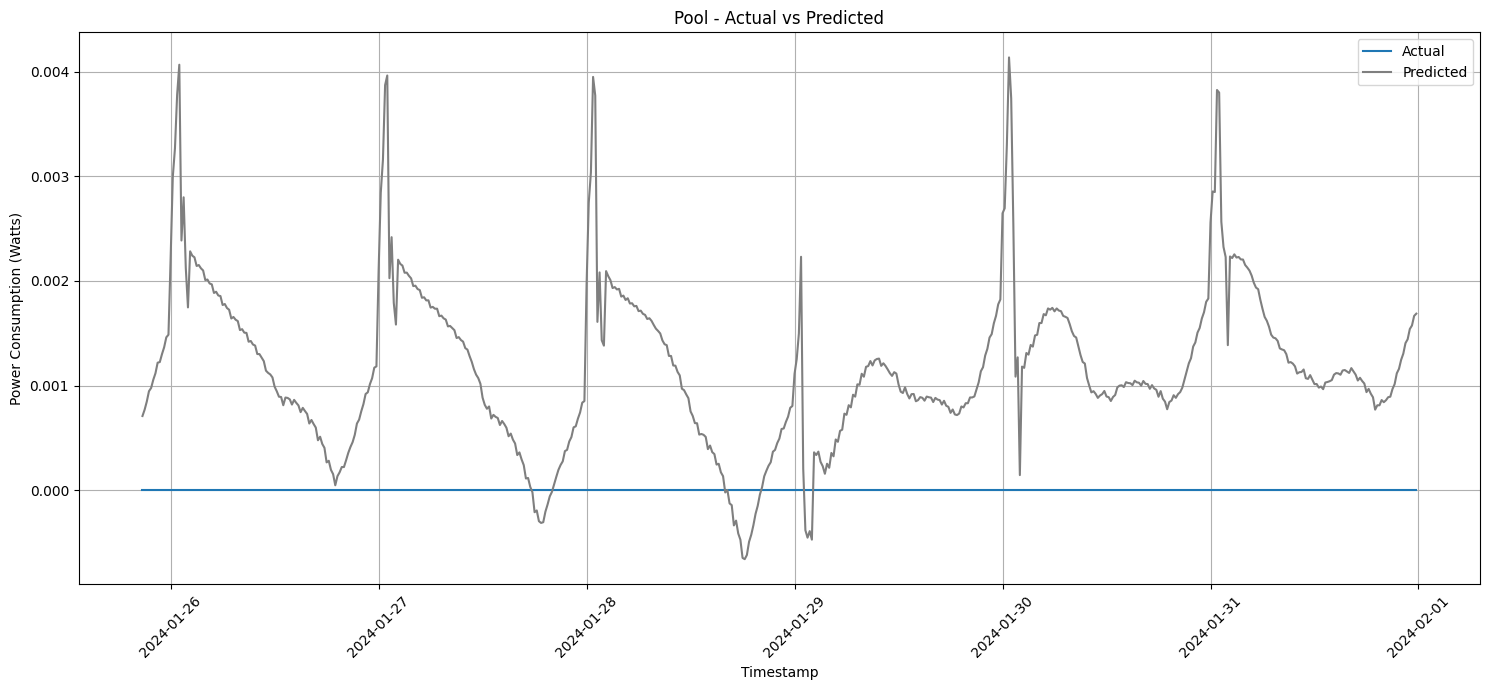

<ipython-input-188-ef875843dede>:41: RuntimeWarning: divide by zero encountered in double_scalars
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-188-ef875843dede>:44: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((actual_values[:, idx] - predicted_values[:, idx]) / actual_values[:, idx])
<ipython-input-188-ef875843dede>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


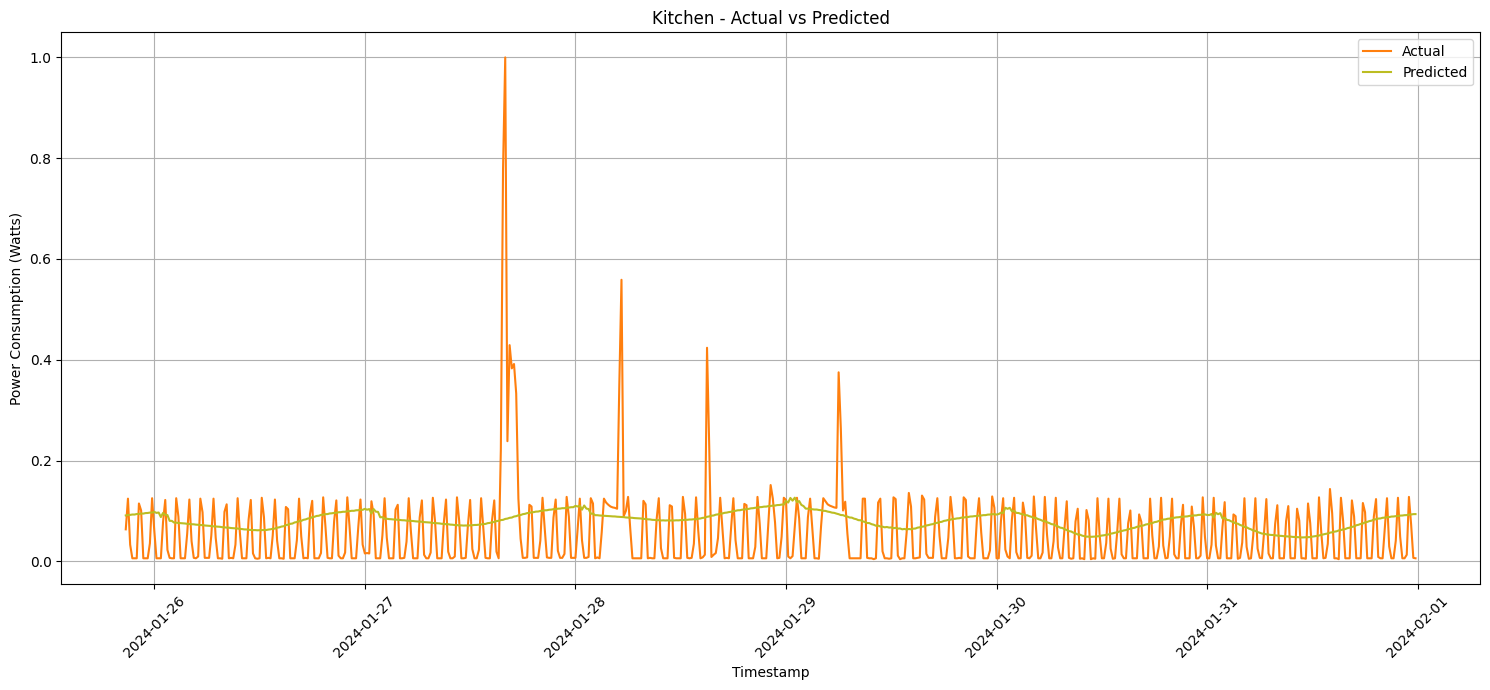

<ipython-input-188-ef875843dede>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


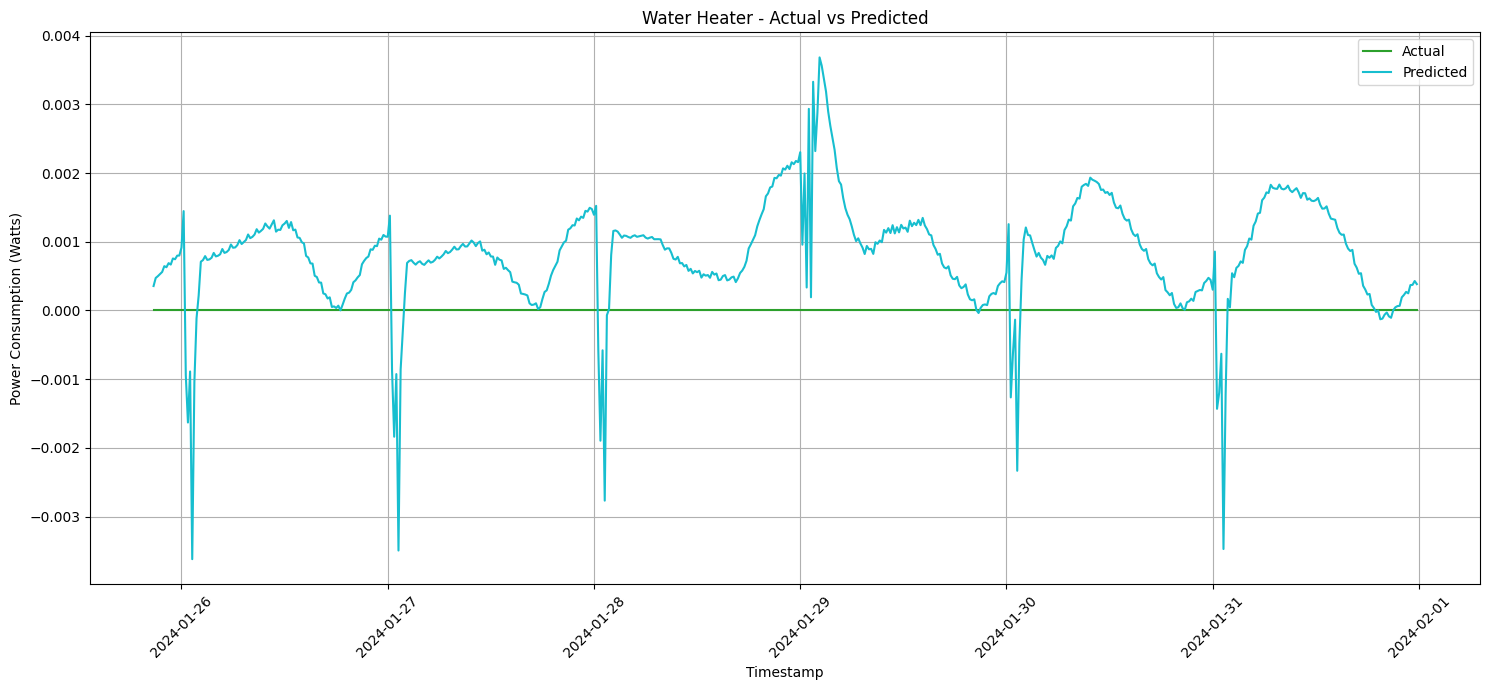

<ipython-input-188-ef875843dede>:41: RuntimeWarning: divide by zero encountered in double_scalars
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-188-ef875843dede>:44: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((actual_values[:, idx] - predicted_values[:, idx]) / actual_values[:, idx])
<ipython-input-188-ef875843dede>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


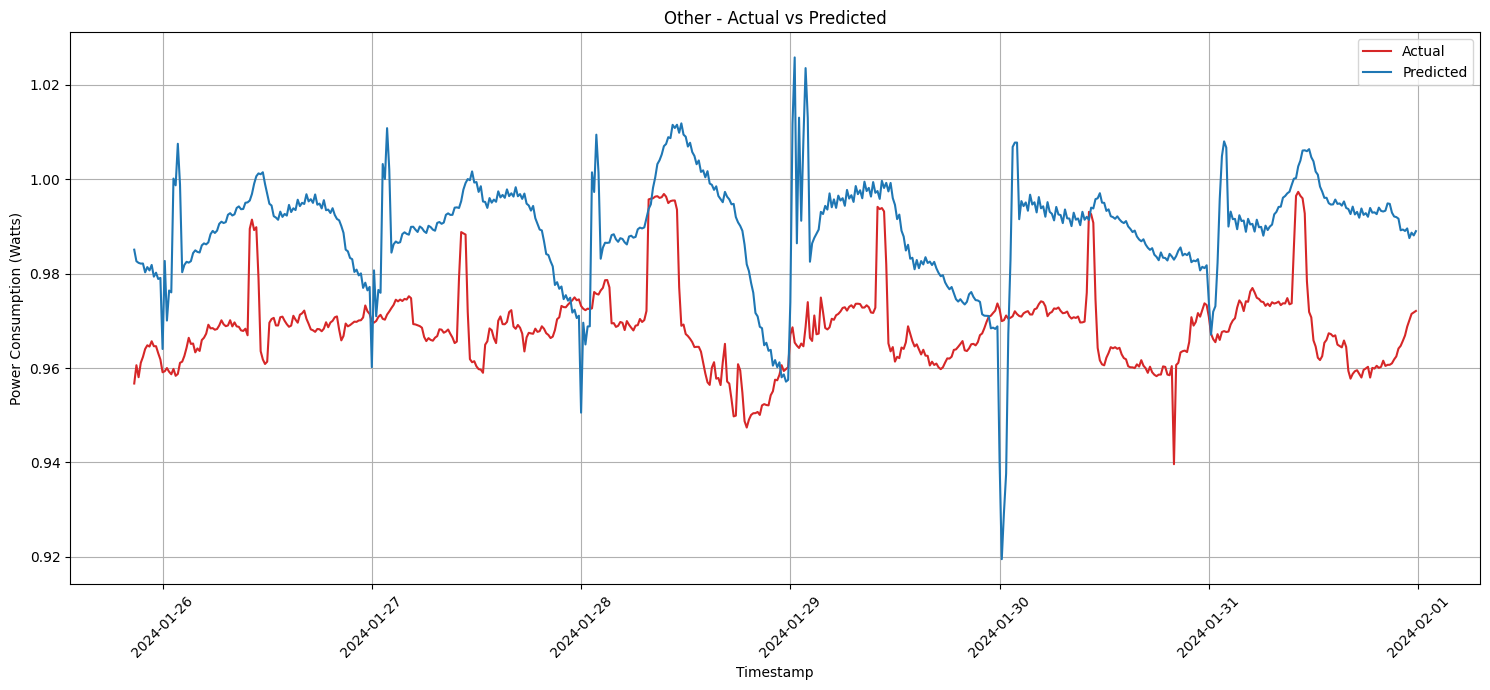

<ipython-input-188-ef875843dede>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


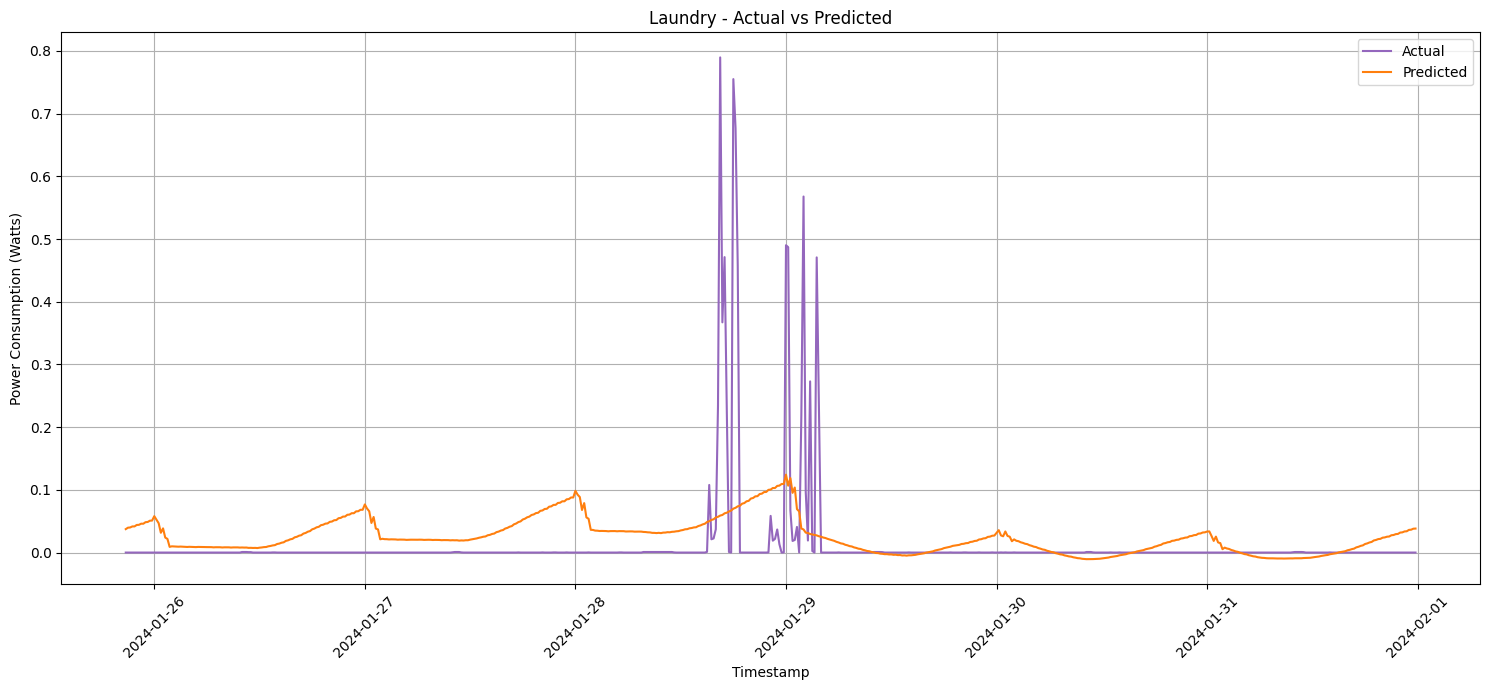

<ipython-input-188-ef875843dede>:44: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((actual_values[:, idx] - predicted_values[:, idx]) / actual_values[:, idx])
<ipython-input-188-ef875843dede>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


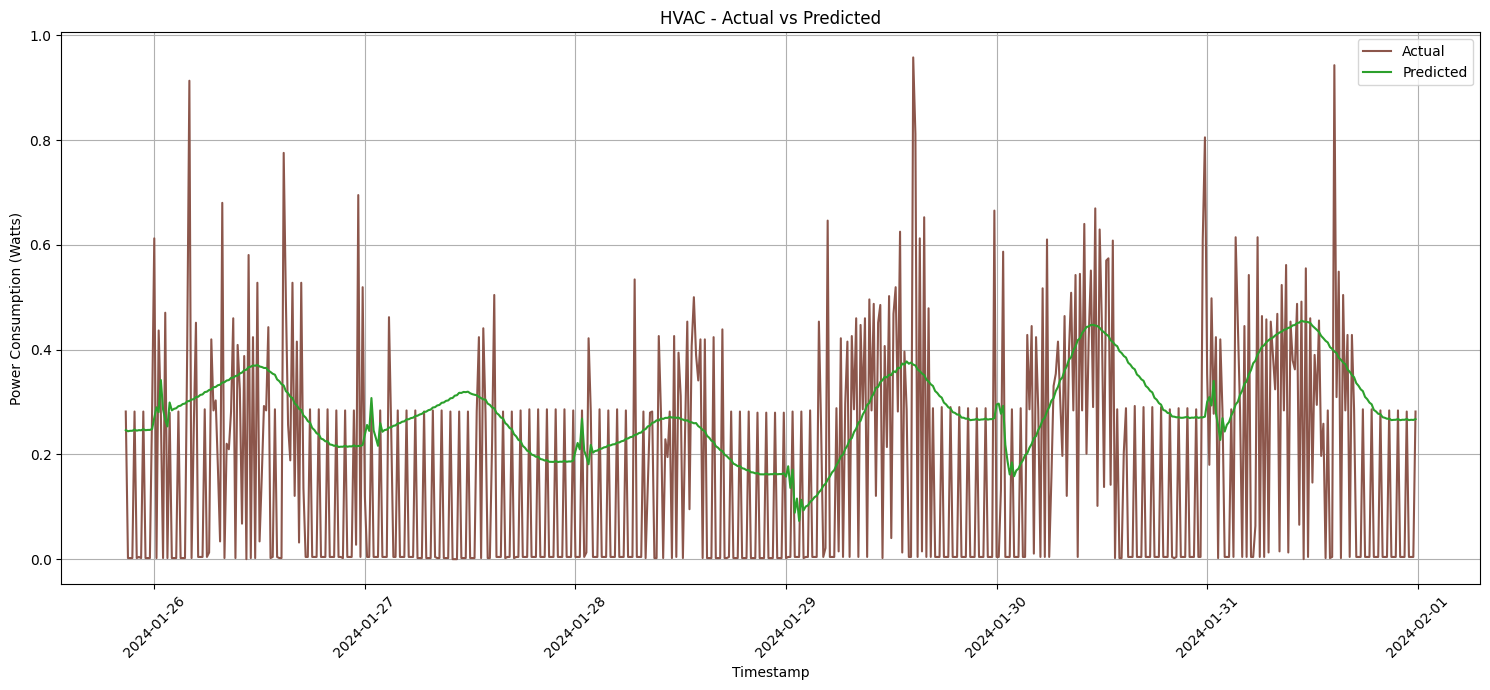

<ipython-input-188-ef875843dede>:44: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((actual_values[:, idx] - predicted_values[:, idx]) / actual_values[:, idx])
<ipython-input-188-ef875843dede>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


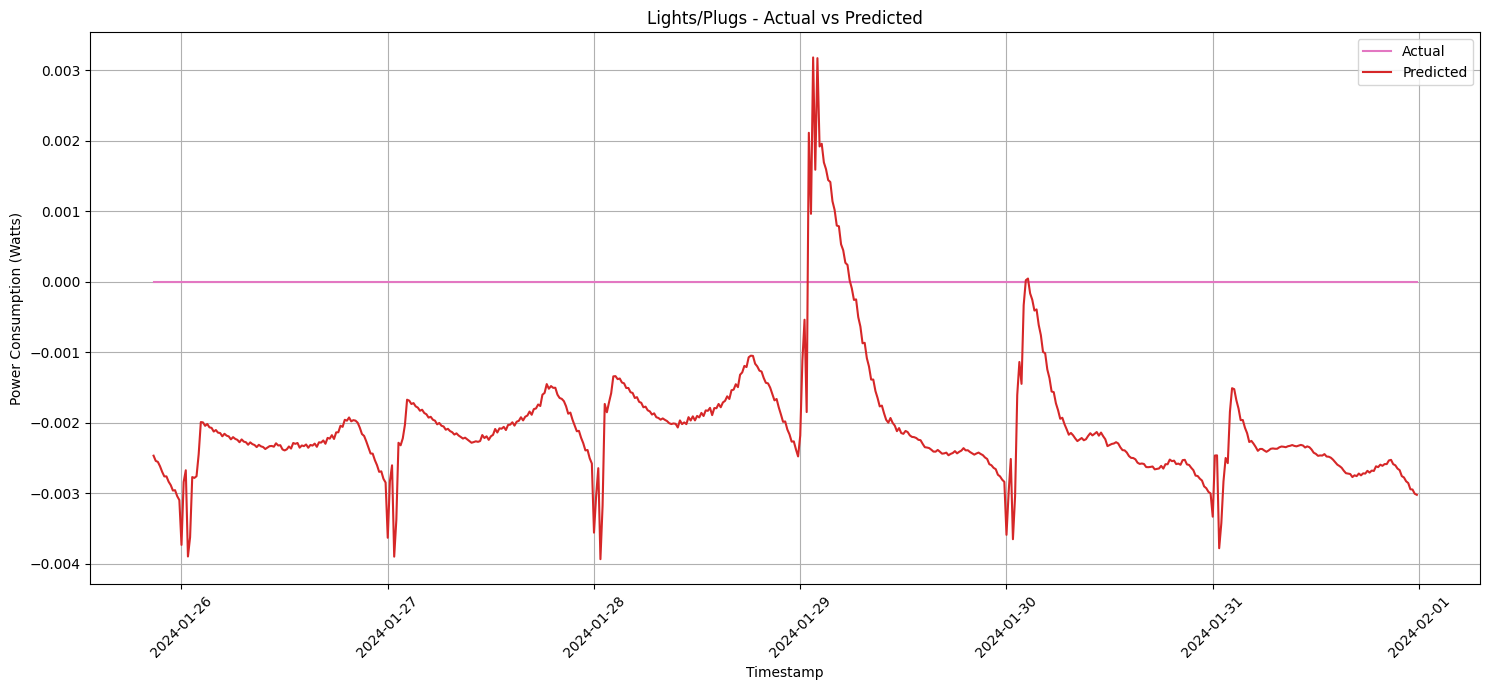

<ipython-input-188-ef875843dede>:41: RuntimeWarning: divide by zero encountered in double_scalars
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-188-ef875843dede>:44: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((actual_values[:, idx] - predicted_values[:, idx]) / actual_values[:, idx])
<ipython-input-188-ef875843dede>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


In [ ]:
# Make predictions only for the selected dataid
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to get them back in Watts instead of normalized
predicted_values = scaler_y.inverse_transform(predictions)
actual_values = scaler_y.inverse_transform(y_test)

# Extract timestamps for test
test_timestamps = data['Timestamp'].iloc[-len(X_test):]

appliance_names = ['Pool', 'Kitchen', 'Water Heater', 'Other', 'Laundry', 'HVAC', 'Lights/Plugs']

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Appliance', 'Actual Total (Watts)', 'Predicted Total (Watts)', 'Percentage Error'])


for idx, appliance in enumerate(appliance_names):
    plt.figure(figsize=(15, 7))

    # Plot actual usage
    plt.plot(test_timestamps, actual_values[:, idx], label='Actual', color='C'+str(idx))

    # Plot predicted usage
    plt.plot(test_timestamps, predicted_values[:, idx], label='Predicted', color='C'+str(idx+7))

    plt.title(f"{appliance} - Actual vs Predicted")
    plt.xlabel('Timestamp')
    plt.ylabel('Power Consumption (Watts)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate actual and predicted total power in watts for the current appliance
    actual_total = actual_values[:, idx].sum()
    predicted_total = predicted_values[:, idx].sum()

    #This was using simple error percentage, switch to MAPE
    # Calculate the percentage error for the current appliance
    percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)

    # Calculate the Mean Absolute Percentage Error (MAPE) for the current appliance
    absolute_percentage_error = np.abs((actual_values[:, idx] - predicted_values[:, idx]) / actual_values[:, idx])
    mape = np.mean(absolute_percentage_error) * 100

    # some MAPE value are extremely high due to a 0 or near 0 value for the actual at a certain point

    # Calculate the Root Mean Square Error (RMSE) for the current appliance
    rmse = np.sqrt(np.mean((actual_values[:, idx] - predicted_values[:, idx]) ** 2))

    # Calculate the Mean Absolute Error (MAE) for the current appliance
    mae = np.mean(np.abs(actual_values[:, idx] - predicted_values[:, idx]))


    # Append the results to the DataFrame
    results_df = results_df.append({'Appliance': appliance,
                                    'Actual Total (Watts)': actual_total,
                                    'Predicted Total (Watts)': predicted_total,
                                    'Percentage Error': percentage_error,
                                    'MAPE': mape,
                                    'RMSE': rmse,
                                    'MAE': mae},
                                   ignore_index=True)